In [1]:
import tarfile
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import pickle

In [2]:
master_dict = {}

### hc-2

In [543]:
dataset = 'hc2'
master_dict[dataset] = {}

In [544]:
session = 'ec013.527'
master_dict[dataset][session] = {}

In [545]:
file =r'C:\Users\miles\Projects\datasets\crcns\hc2\ec013.527\ec013.527.clu.1'
os.path.abspath('C:\\Users\\miles\\Projects\\datasets')

'C:\\Users\\miles\\Projects\\datasets'

In [546]:
def get_data(clusters_file, spikes_file):
#     labels_file = open(labels_file)
    clusters = clusters_file.readlines()
    num_clu = int(clusters[0][:-1])-2
#     num_clu = clusters[0][:-1]
    clusters = np.array([k[:-1] for k in clusters],dtype='int')[1:]
#     labels = np.array([k[:-1] for k in labels])
    
    spikes = spikes_file.readlines()
    spikes = np.array([k[:-1] for k in spikes],dtype='float')
    
    spikes = spikes[clusters>1]
    clusters = clusters[clusters>1]
    
    spikes, clusters = spikes[spikes.argsort()], clusters[spikes.argsort()] # sorting the arrays by spike time
    
    
    return clusters, spikes, num_clu


In [547]:
shanks = 4

In [548]:
clusters, spikes, num_clu = [],[],[]

for i in range(shanks):
    (clusters_file, spikes_file) = (
        open(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\hc2\\ec013.527\\ec013.527.clu.{i+1}"),
        open(f"C:\\Users\miles\\Projects\\datasets\\crcns\\hc2\\ec013.527\\ec013.527.res.{i+1}")
    )
    a,b,c = get_data(clusters_file, spikes_file)
    a,b = a.astype(int), (b/20).astype(int)
    clusters.append(a)
    spikes.append(b)
    num_clu.append(c)
    master_dict[dataset][session][i] = {}
    master_dict[dataset][session][i]['raster'] = (b,a)
    master_dict[dataset][session][i]['surrogate'] = (b+np.random.randint(-2,3,len(b)),a)
      

In [549]:
master_dict

{'hc2': {'ec013.527': {0: {'raster': (array([   3150,    3957,    5109, ..., 1058318, 1058344, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12])),
    'surrogate': (array([   3148,    3957,    5110, ..., 1058316, 1058343, 1058346]),
     array([ 7, 11, 12, ..., 12, 12, 12]))},
   1: {'raster': (array([      7,      53,      76, ..., 1059719, 1059734, 1059969]),
     array([ 6,  4,  4, ...,  4, 10,  4])),
    'surrogate': (array([      6,      52,      74, ..., 1059720, 1059732, 1059969]),
     array([ 6,  4,  4, ...,  4, 10,  4]))},
   2: {'raster': (array([      2,      25,      53, ..., 1059919, 1059937, 1059985]),
     array([5, 5, 4, ..., 5, 5, 5])),
    'surrogate': (array([      4,      27,      53, ..., 1059921, 1059938, 1059983]),
     array([5, 5, 4, ..., 5, 5, 5]))},
   3: {'raster': (array([   3953,    5431,    7545, ..., 1059634, 1059901, 1060090]),
     array([4, 3, 5, ..., 4, 4, 4])),
    'surrogate': (array([   3952,    5429,    7545, ..., 1059635, 1059903, 1060090]),

In [571]:
for key1 in master_dict.keys():
#     print(key1)/
    for key2 in master_dict[key1].keys():
#         print(key2)
        for key3 in master_dict[key1][key2].keys():
#             print(key3)
            if key3 != 0:
                raster_spikes, raster_labels = master_dict[key1][key2][key3]['raster']
#                     surrogate_spikes, surrogate_labels = master_dict[key1][key2][key3]['surrogate']
                
#                 print(raster_spikes.shape)

(2833,)
(34483,)
(44912,)
(13175,)


In [576]:
raster_spikes, raster_labels = master_dict['hc2']['ec013.527'][1]['raster']
surrogate_spikes, surrogate_labels = master_dict['hc2']['ec013.527'][1]['surrogate']

### ac-3
Big Dataset!!!

In [3]:
dataset = 'ac3'
master_dict[dataset] = {}
master_dict

{'ac3': {}}

In [4]:
filenames = os.listdir(r'C:\Users\miles\Projects\datasets\crcns\ac3\Data')
import scipy.io
test = [scipy.io.loadmat(r'C:\Users\miles\Projects\datasets\crcns\ac3\Data\\'+k) for k in filenames]
df = pd.DataFrame(test[0]['spk'][0])
fs = 20 # Sampling rate in kHz
num_units = test[0]['spk'][0]['spiketimes'].shape[0]
spikes = np.array([])
labels = np.array([])
for i in range(num_units):
    spikes = np.hstack((spikes,test[0]['spk'][0]['spiketimes'][i].squeeze()))
    labels = np.hstack((labels,i*np.ones_like(test[0]['spk'][0]['spiketimes'][i].squeeze())))
spikes, labels = spikes[spikes.argsort()], labels[spikes.argsort()] # sorting the arrays by spike time
spikes = np.round(spikes).astype(int)
labels = labels.astype(int)
print(spikes.shape,labels.shape)

(72240,) (72240,)


In [5]:
dataset = 'ac3'
session = 1
shank = 1
master_dict[dataset][session] = {}

In [6]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [7]:
split=1
master_dict[dataset][session][split] = {}
master_dict[dataset][session][split]['raster'] = (spikes[labels<=15], labels[labels<=15])
master_dict[dataset][session][split]['surrogate'] = (spikes[labels<=15]+np.random.randint(-2,3,len(spikes[labels<=15])), labels[labels<=15])

In [8]:
split=2
master_dict[dataset][session][split] = {}
master_dict[dataset][session][split]['raster'] = (spikes[labels>15], labels[labels>15])
master_dict[dataset][session][split]['surrogate'] = (spikes[labels>15]+np.random.randint(-2,3,len(spikes[labels>15])), labels[labels>15])

In [518]:
master_dict

{'hc2': {'ec013.527': {0: {'raster': (array([   3150,    3957,    5109, ..., 1058318, 1058344, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12])),
    'surrogate': (array([   3150,    3955,    5107, ..., 1058320, 1058342, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12]))},
   1: {'raster': (array([      7,      53,      76, ..., 1059719, 1059734, 1059969]),
     array([ 6,  4,  4, ...,  4, 10,  4])),
    'surrogate': (array([      5,      55,      75, ..., 1059718, 1059735, 1059970]),
     array([ 6,  4,  4, ...,  4, 10,  4]))},
   2: {'raster': (array([      2,      25,      53, ..., 1059919, 1059937, 1059985]),
     array([5, 5, 4, ..., 5, 5, 5])),
    'surrogate': (array([      2,      24,      51, ..., 1059920, 1059937, 1059986]),
     array([5, 5, 4, ..., 5, 5, 5]))},
   3: {'raster': (array([   3953,    5431,    7545, ..., 1059634, 1059901, 1060090]),
     array([4, 3, 5, ..., 4, 4, 4])),
    'surrogate': (array([   3955,    5431,    7547, ..., 1059635, 1059903, 1060089]),

### fcx-1

In [519]:
test = scipy.io.loadmat(r'C:\Users\miles\Projects\datasets\crcns\fcx-1\Dino_061914_ACC\Dino_061914_ACC_SStable.mat')
df = pd.DataFrame(test['S_CellFormat'])
data = test['S_CellFormat'][0]
num_units = data.shape[0]
spikes = ([])
labels = ([])
for i in range(num_units):
    spikes = np.hstack((spikes,data[i].squeeze()))
    labels = np.hstack((labels,i*np.ones_like(data[i].squeeze())))
spikes, labels = spikes[spikes.argsort()], labels[spikes.argsort()] # sorting the arrays by spike time
print(spikes.shape,labels.shape)

(1116078,) (1116078,)


In [520]:
test = scipy.io.loadmat(r'C:\Users\miles\Projects\datasets\crcns\fcx-1\Dino_061914_ACC\Dino_061914_ACC_BasicMetaData.mat')
df = pd.DataFrame(test['bmd'][0])
intervals = df['RecordingFileIntervals'].to_numpy()[0]
splits=4
n = int(len(np.unique(labels))/splits)

In [521]:
dataset='fcx1'
session = 'Dino_061914'
master_dict[dataset] = {}
master_dict[dataset][session] = {}

In [523]:
for trial,interval in enumerate(intervals):
    master_dict[dataset][session][trial] = {}
    for split in range(splits):
        master_dict[dataset][session][trial][split] = {}
        condition = ((spikes >= interval[0]) & (spikes<= interval[1]) & (labels>=n*split) & (labels<(n*split+n)))
        master_dict[dataset][session][trial][split]['raster'] = (np.round(spikes[condition]).astype(int), labels[condition].astype(int))
        master_dict[dataset][session][trial][split]['surrogate'] = (np.round(spikes[condition]).astype(int)+np.random.randint(-2,3,len(spikes[condition])), labels[condition].astype(int))
    

In [525]:
master_dict

{'hc2': {'ec013.527': {0: {'raster': (array([   3150,    3957,    5109, ..., 1058318, 1058344, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12])),
    'surrogate': (array([   3150,    3955,    5107, ..., 1058320, 1058342, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12]))},
   1: {'raster': (array([      7,      53,      76, ..., 1059719, 1059734, 1059969]),
     array([ 6,  4,  4, ...,  4, 10,  4])),
    'surrogate': (array([      5,      55,      75, ..., 1059718, 1059735, 1059970]),
     array([ 6,  4,  4, ...,  4, 10,  4]))},
   2: {'raster': (array([      2,      25,      53, ..., 1059919, 1059937, 1059985]),
     array([5, 5, 4, ..., 5, 5, 5])),
    'surrogate': (array([      2,      24,      51, ..., 1059920, 1059937, 1059986]),
     array([5, 5, 4, ..., 5, 5, 5]))},
   3: {'raster': (array([   3953,    5431,    7545, ..., 1059634, 1059901, 1060090]),
     array([4, 3, 5, ..., 4, 4, 4])),
    'surrogate': (array([   3955,    5431,    7547, ..., 1059635, 1059903, 1060089]),

### pfc-2 SKIP

In [526]:
test = scipy.io.loadmat(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\pfc-2\\EE.088\\EE.088_Behavior.mat")

In [527]:
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ans', 'rp', 'fileBase', 'Eeg', 'Session', 'SessionNP', 'NosePokeMtx', 'whlrl', 'whlrl_1d', 'whlrl_ex', 'whlrl_speed', 'SectionXYRL', 'whlrl_exs', 'whlrld'])

In [528]:
i=16
list(test.keys())[i],test[list(test.keys())[i]]

('whlrld',
 array([[-1., -1.,  0., ...,  0.,  0.,  0.],
        [-1., -1.,  0., ...,  0.,  0.,  0.],
        [-1., -1.,  0., ...,  0.,  0.,  0.],
        ...,
        [-1., -1.,  0., ...,  0.,  0.,  0.],
        [-1., -1.,  0., ...,  0.,  0.,  0.],
        [-1., -1.,  0., ...,  0.,  0.,  0.]]))

In [529]:
shanks = 13

In [530]:
clusters, spikes, num_clu = [],[],[]

for i in range(shanks):
    (clusters_file, spikes_file) = (
        open(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\pfc-2\\EE.081\\EE.081.clu.{i+1}"),
        open(f"C:\\Users\miles\\Projects\\datasets\\crcns\\pfc-2\\EE.081\\EE.081.res.{i+1}")
    )
    a,b,c = get_data(clusters_file, spikes_file)
    clusters.append(a)
    spikes.append(b)
    num_clu.append(c)

In [309]:
corrupted = [7,12]
dataset = 'pfc2'
session = 'EE.081'
master_dict[dataset] = {}
master_dict[dataset][session] = {}

In [310]:
for i in range(shanks):
    if i not in corrupted:
        print(len(spikes[i]))
#         master_dict[dataset][session][i] = (spike)

962
3075
1537
836
376
975
871
1688
8248
8224
4295


In [311]:
len(spikes[0])

962

In [313]:
np.max(spikes[0]) # This is a 1 hour long recording then...

174017.45

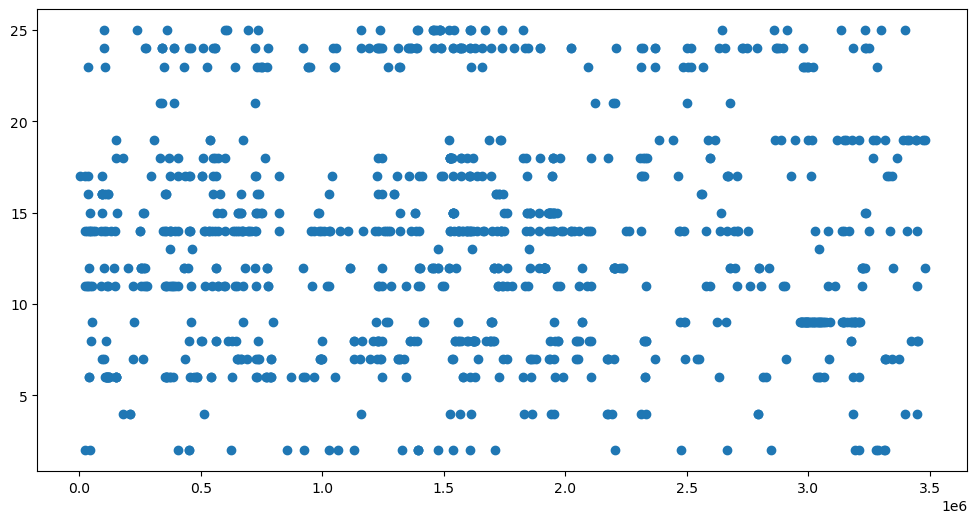

In [298]:
plt.figure(figsize=(12,6))
plt.scatter(spikes[0],clusters[0])
plt.show()

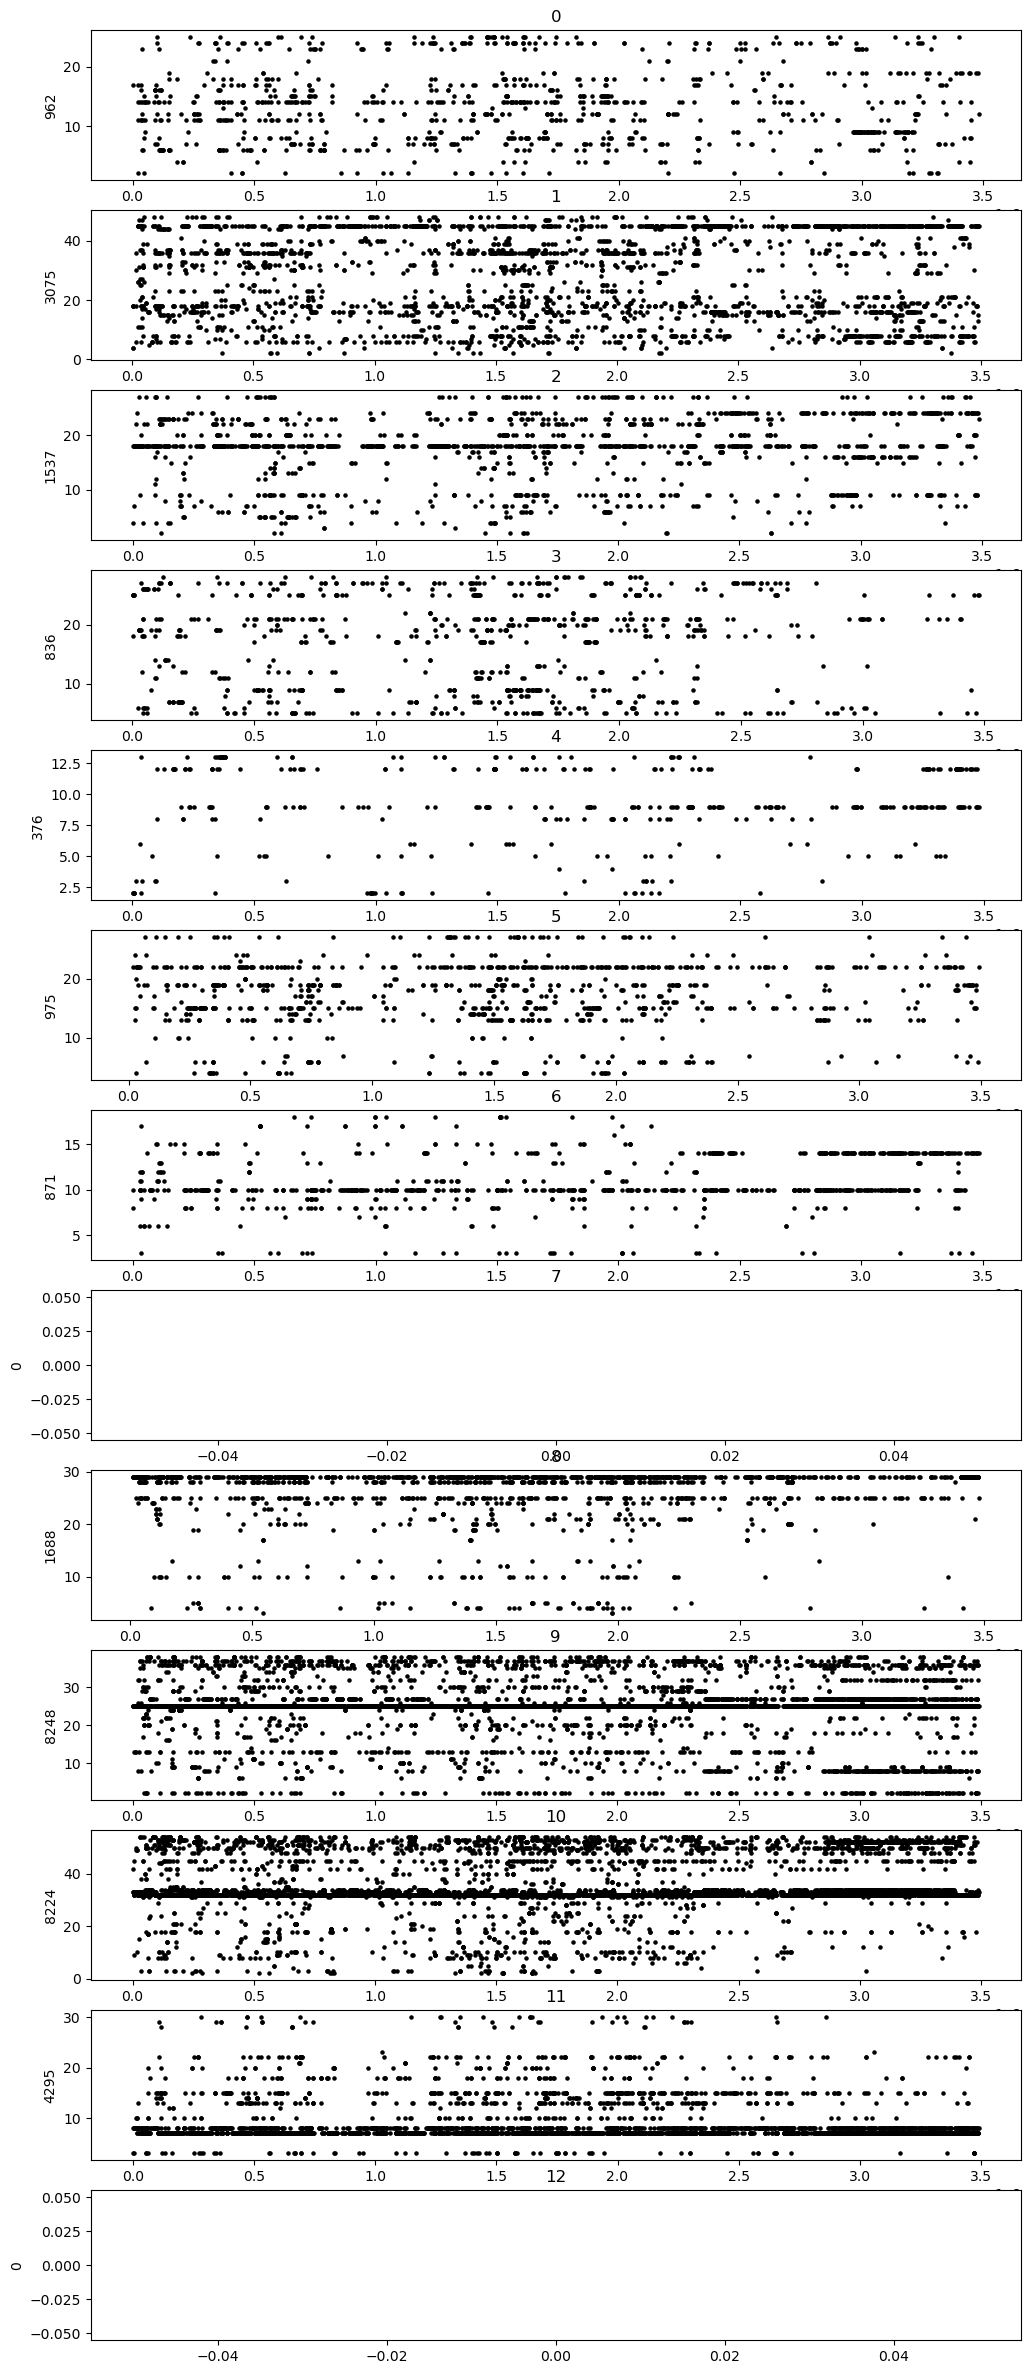

In [286]:
fig, ax = plt.subplots(shanks,figsize=(12,30))
for i in range(shanks):
    ax[i].scatter(spikes[i],clusters[i], c='black',s=5)
    ax[i].set_ylabel(len(spikes[i]))
    ax[i].set_title(i)

plt.show()

### ssc3 ALSO SKIP

In [321]:
filenames = os.listdir(r'C:\Users\miles\Projects\datasets\crcns\ssc-3\data')
ssc3 = [scipy.io.loadmat(f'C:\\Users\\miles\\Projects\\datasets\\crcns\\ssc-3\\data\\{k}') for k in filenames]
num_units = ssc3[0]['data'][0,0][1][0,0]
spikes = np.array([])
labels = np.array([])
for i in range(num_units):
    spikes = np.hstack((spikes,ssc3[0]['data'][0,0][0][i][0][0]))
    labels = np.hstack((labels,i*np.ones_like(ssc3[0]['data'][0,0][0][i][0][0])))
spikes, labels = spikes[spikes.argsort()], labels[spikes.argsort()] # sorting the arrays by spike time
spikes.shape, labels.shape

((938018,), (938018,))

In [315]:
np.max(spikes) # this is in ms

3599995.65

In [ ]:
for trial,interval in enumerate(intervals):
    master_dict[dataset][session][trial] = {}
    for split in range(splits):
        condition = ((spikes >= interval[0]) & (spikes<= interval[1]) & (labels>=n*split) & (labels<(n*split+n)))
        master_dict[dataset][session][trial][split] = (np.round(spikes[condition]).astype(int), labels[condition].astype(int))
    

In [322]:
np.unique(labels)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

### Teppola

In [338]:
from scipy.io import loadmat
mat_data = loadmat('./CTRL_AMPAR_GABAAR_BLOCKED_FIRINGS_.mat')
data = mat_data['CTRL_firings']
spikes = data.T[0]
# spikes = np.round(spikes).astype('int')
# labels = data.T[1].astype('int')

In [339]:
len(spikes), len(labels)

(267028, 267028)

In [341]:
spikes[:50]

array([4487.4 , 4488.84, 4494.08, 4494.28, 4495.4 , 4495.52, 4496.16,
       4496.4 , 4497.36, 4497.6 , 4498.32, 4499.44, 4499.76, 4499.84,
       4500.76, 4501.4 , 4501.48, 4501.48, 4502.08, 4502.48, 4503.  ,
       4503.96, 4504.48, 4504.52, 4504.64, 4504.84, 4505.04, 4505.2 ,
       4505.6 , 4505.68, 4506.36, 4506.48, 4506.92, 4507.32, 4507.72,
       4507.76, 4508.  , 4508.04, 4508.24, 4508.56, 4508.6 , 4508.84,
       4508.96, 4509.16, 4509.48, 4509.64, 4509.76, 4509.8 , 4510.08,
       4510.48])

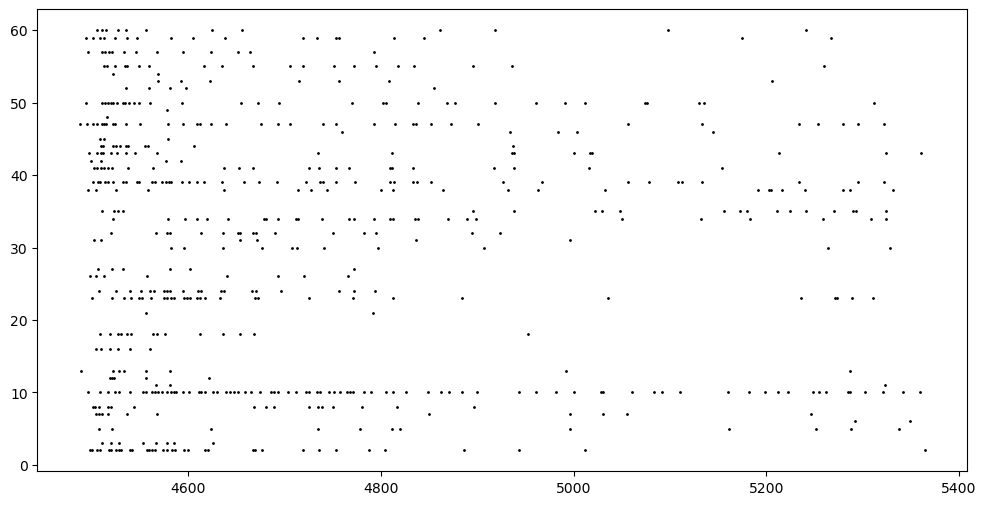

In [342]:
plt.figure(figsize=(12,6))
plt.scatter(spikes[spikes<6000],labels[spikes<6000],c='black',s=1)
plt.show()

In [532]:
master_dict.keys()

dict_keys(['hc2', 'ac3', 'fcx1'])

In [536]:
import pickle
filename = '2023-11-05_hc2_ac3_fcx1.pickle'

In [538]:
with open(filename, 'wb') as handle:
    pickle.dump(master_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [539]:
master_dict

{'hc2': {'ec013.527': {0: {'raster': (array([   3150,    3957,    5109, ..., 1058318, 1058344, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12])),
    'surrogate': (array([   3150,    3955,    5107, ..., 1058320, 1058342, 1058347]),
     array([ 7, 11, 12, ..., 12, 12, 12]))},
   1: {'raster': (array([      7,      53,      76, ..., 1059719, 1059734, 1059969]),
     array([ 6,  4,  4, ...,  4, 10,  4])),
    'surrogate': (array([      5,      55,      75, ..., 1059718, 1059735, 1059970]),
     array([ 6,  4,  4, ...,  4, 10,  4]))},
   2: {'raster': (array([      2,      25,      53, ..., 1059919, 1059937, 1059985]),
     array([5, 5, 4, ..., 5, 5, 5])),
    'surrogate': (array([      2,      24,      51, ..., 1059920, 1059937, 1059986]),
     array([5, 5, 4, ..., 5, 5, 5]))},
   3: {'raster': (array([   3953,    5431,    7545, ..., 1059634, 1059901, 1060090]),
     array([4, 3, 5, ..., 4, 4, 4])),
    'surrogate': (array([   3955,    5431,    7547, ..., 1059635, 1059903, 1060089]),